In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
!apt-get update -qq
!apt-get install fonts-nanum* -qq

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 46 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 39 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import re
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf' # 나눔 고딕
font_name = fm.FontProperties(fname=path, size=10).get_name() # 기본 폰트 사이즈 : 10
plt.rc('font', family=font_name)

In [2]:
data = pd.read_csv('drop_dupllicates.csv')
data

,제작자,차명,생산기간(부터),생산기간(까지),리콜개시일,리콜사유
0,혼다코리아(주),CBR1000RR-R,2021-04-29,2021-05-12,2022-01-03,제작 공정 중 라디에이터 캡의 제조 불량으로 라디에이터 캡과 필러넥이 제대로 밀착되...
1,폭스바겐그룹코리아 주식회사,Polo 5 FL 1.4 TDI BMT,2014-11-17,2014-11-25,2022-01-05,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ..."
2,폭스바겐그룹코리아 주식회사,Jetta 6 FL 2.0 TDI 110PS,2014-11-05,2015-02-26,2022-01-05,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ..."
3,폭스바겐그룹코리아 주식회사,Jetta 1.6 TDI BMT,2011-02-28,2012-09-25,2022-01-05,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ..."
4,폭스바겐그룹코리아 주식회사,Golf A7 1.6 TDI BMT,2014-12-19,2015-02-26,2022-01-05,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ..."
...,...,...,...,...,...,...
1409,비엠더블유코리아(주),BMW i4 M50,2021-11-22,2022-10-24,2022-12-26,배터리 관리 모듈(SME)*과 관련한 제작 결함이 발견되었습니다. *배터리 관리 모...
1410,비엠더블유코리아(주),BMW i4 eDrive40,2021-11-23,2022-10-24,2022-12-26,배터리 관리 모듈(SME)*과 관련한 제작 결함이 발견되었습니다. *배터리 관리 모...
1411,(주)스포츠모터사이클코리아,1290 SUPER DUKE R,2020-02-11,2022-04-29,2022-12-27,메인 와이어링 하네스와 차체 구성 부품 간의 간섭으로 인한 피복 손상으로 배선 단선...
1412,화창상사(주),SPRINGFIELD,2019-10-28,2020-06-03,2022-12-27,차량제어모듈(VEHICLE CONTROL MODULE) 및 커넥터 접촉 불량(헐거움...


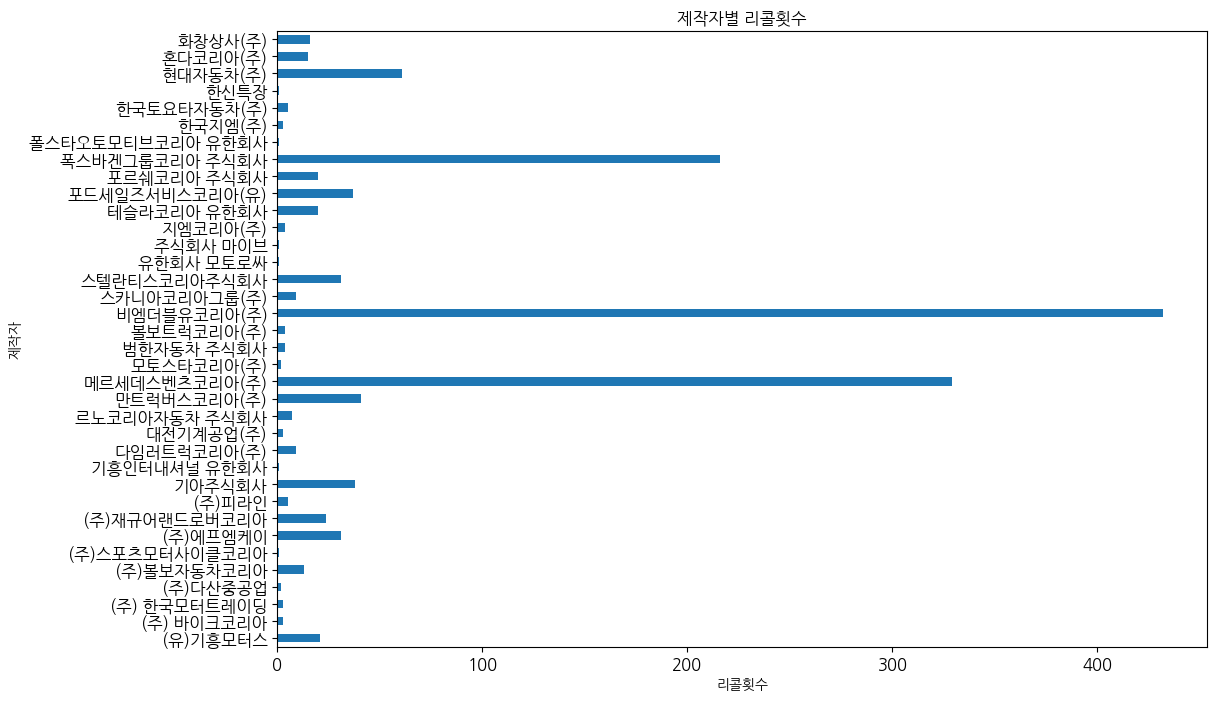

In [3]:
firm_data = data.groupby('제작자')['차명'].count()

plt.figure(figsize=(12, 8))
firm_data.plot(kind='barh', fontsize=12)
plt.xlabel('리콜횟수',)
plt.ylabel('제작자')
plt.title('제작자별 리콜횟수')
plt.xticks()
plt.yticks()
plt.show()

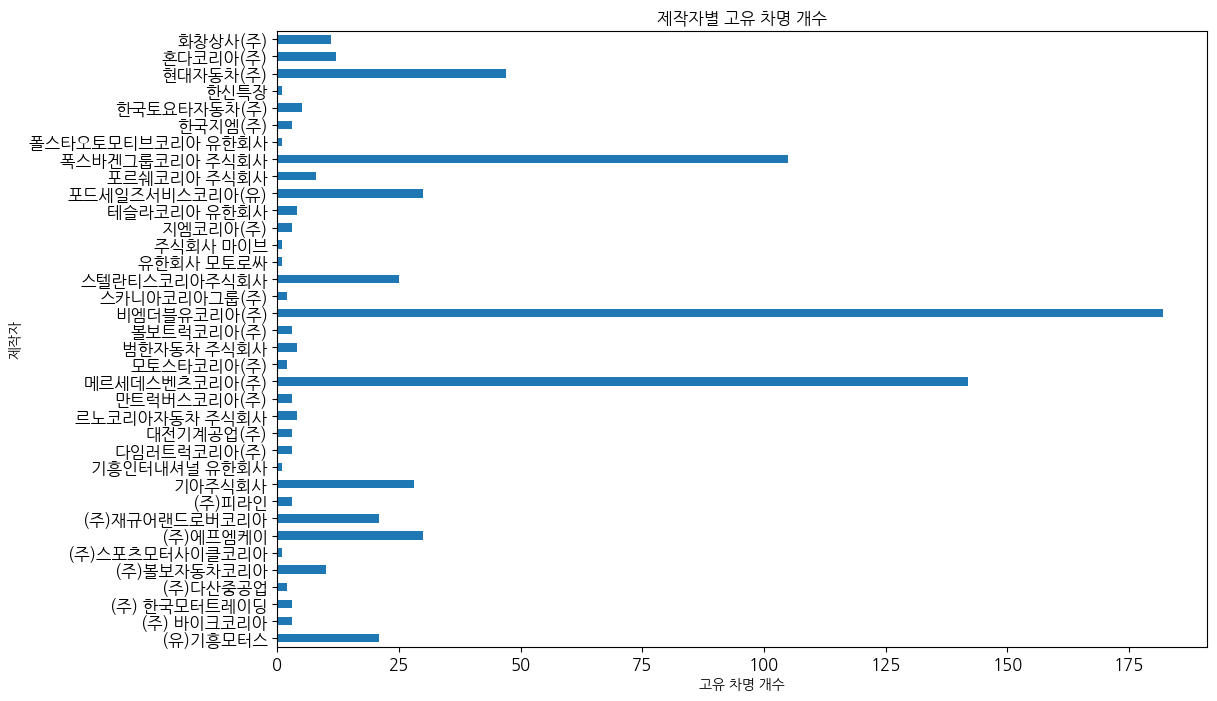

In [4]:
# 제작자별 고유한 차명 개수를 계산합니다.
name_data = data.groupby('제작자')['차명'].nunique()

# 막대 그래프의 크기를 설정합니다.
plt.figure(figsize=(12, 8))
name_data.plot(kind='barh', fontsize=12)
plt.xlabel('고유 차명 개수')
plt.ylabel('제작자')
plt.title('제작자별 고유 차명 개수')
plt.xticks()
plt.yticks()
plt.show()

<Figure size 1400x1000 with 0 Axes>

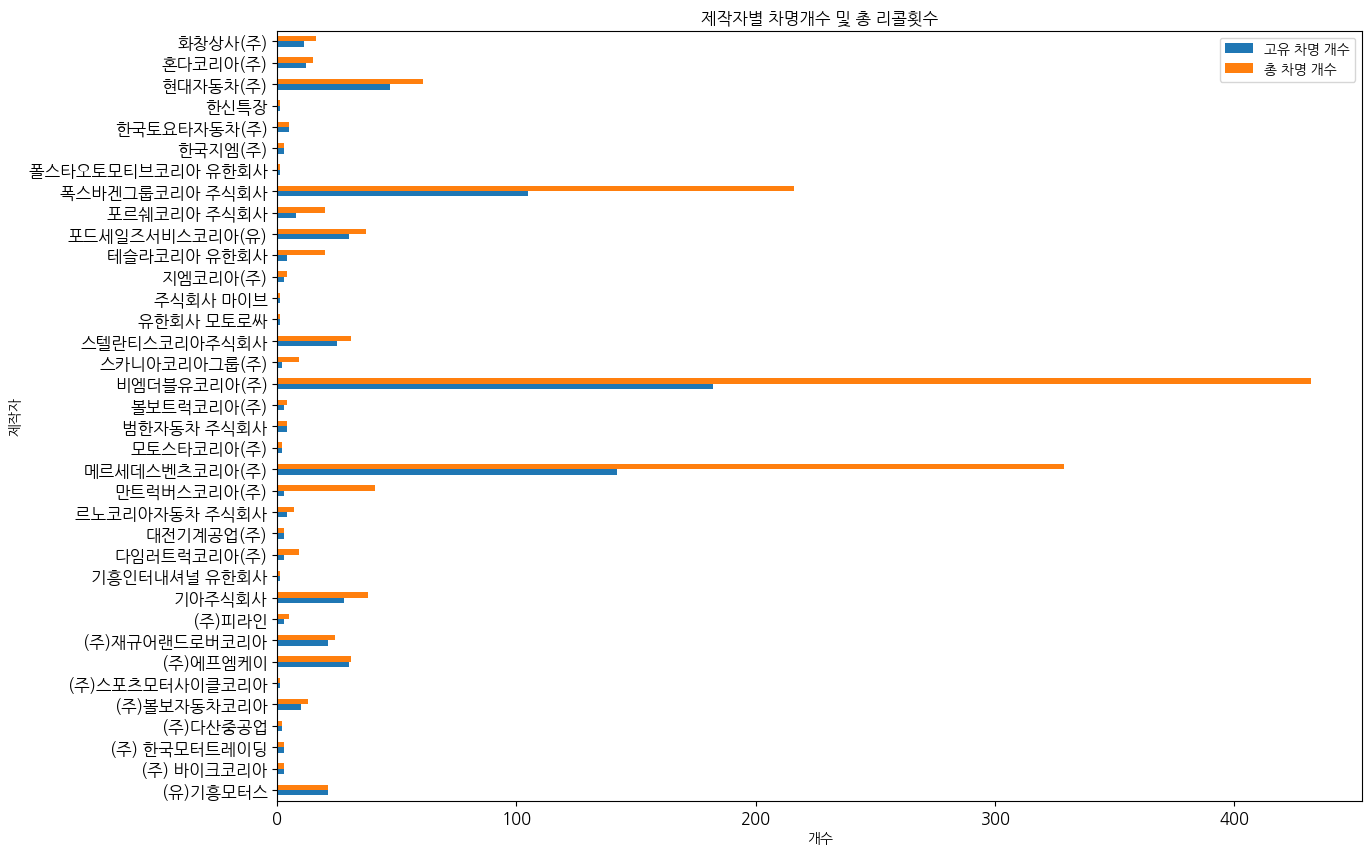

In [5]:
# 두 데이터를 하나의 데이터프레임으로 합칩니다.
combined_data = pd.DataFrame({'고유 차명 개수': name_data, '총 차명 개수': firm_data})

# 막대 그래프의 크기를 설정합니다.
plt.figure(figsize=(14, 10))

# 막대 그래프를 그립니다.
combined_data.plot(kind='barh', figsize=(14, 10), fontsize=12)
plt.xlabel('개수')
plt.ylabel('제작자')
plt.title('제작자별 차명개수 및 총 리콜횟수')
plt.xticks()
plt.yticks()
plt.legend()
plt.show()

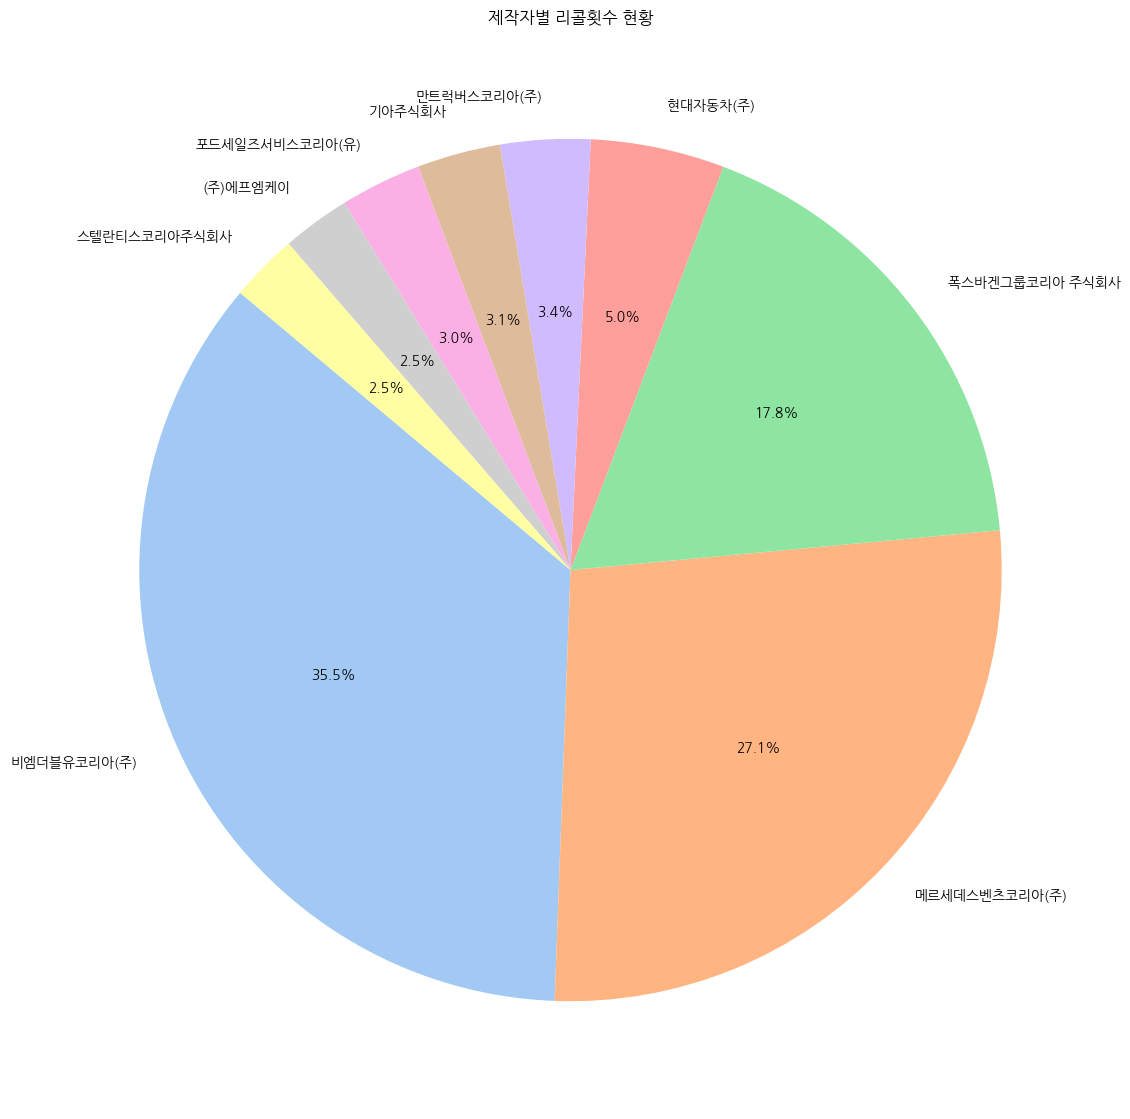

In [6]:
# 제작자별 차종 개수 계산
car_counts = data['제작자'].value_counts()

# 차종의 전체 개수
total_count = car_counts.sum()

# 2% 미만의 항목 제외
filtered_car_counts = car_counts[car_counts / total_count >= 0.02]

# 파이 차트 생성
plt.figure(figsize=(20, 14))
filtered_car_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.ylabel('')
plt.title('제작자별 리콜횟수 현황')
plt.show()

In [7]:
# 월별 리콜 현황
months = []
for i in data['리콜개시일']:
    months.append(i.split('-')[1])
month = pd.DataFrame(months, columns=['리콜개시월'])
data = pd.concat([data, month], axis=1)
data

,제작자,차명,생산기간(부터),생산기간(까지),리콜개시일,리콜사유,리콜개시월
0,혼다코리아(주),CBR1000RR-R,2021-04-29,2021-05-12,2022-01-03,제작 공정 중 라디에이터 캡의 제조 불량으로 라디에이터 캡과 필러넥이 제대로 밀착되...,01
1,폭스바겐그룹코리아 주식회사,Polo 5 FL 1.4 TDI BMT,2014-11-17,2014-11-25,2022-01-05,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ...",01
2,폭스바겐그룹코리아 주식회사,Jetta 6 FL 2.0 TDI 110PS,2014-11-05,2015-02-26,2022-01-05,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ...",01
3,폭스바겐그룹코리아 주식회사,Jetta 1.6 TDI BMT,2011-02-28,2012-09-25,2022-01-05,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ...",01
4,폭스바겐그룹코리아 주식회사,Golf A7 1.6 TDI BMT,2014-12-19,2015-02-26,2022-01-05,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ...",01
...,...,...,...,...,...,...,...
1409,비엠더블유코리아(주),BMW i4 M50,2021-11-22,2022-10-24,2022-12-26,배터리 관리 모듈(SME)*과 관련한 제작 결함이 발견되었습니다. *배터리 관리 모...,12
1410,비엠더블유코리아(주),BMW i4 eDrive40,2021-11-23,2022-10-24,2022-12-26,배터리 관리 모듈(SME)*과 관련한 제작 결함이 발견되었습니다. *배터리 관리 모...,12
1411,(주)스포츠모터사이클코리아,1290 SUPER DUKE R,2020-02-11,2022-04-29,2022-12-27,메인 와이어링 하네스와 차체 구성 부품 간의 간섭으로 인한 피복 손상으로 배선 단선...,12
1412,화창상사(주),SPRINGFIELD,2019-10-28,2020-06-03,2022-12-27,차량제어모듈(VEHICLE CONTROL MODULE) 및 커넥터 접촉 불량(헐거움...,12


<Axes: title={'center': '2022년 월별 리콜 현황'}, xlabel='월', ylabel='리콜 수'>

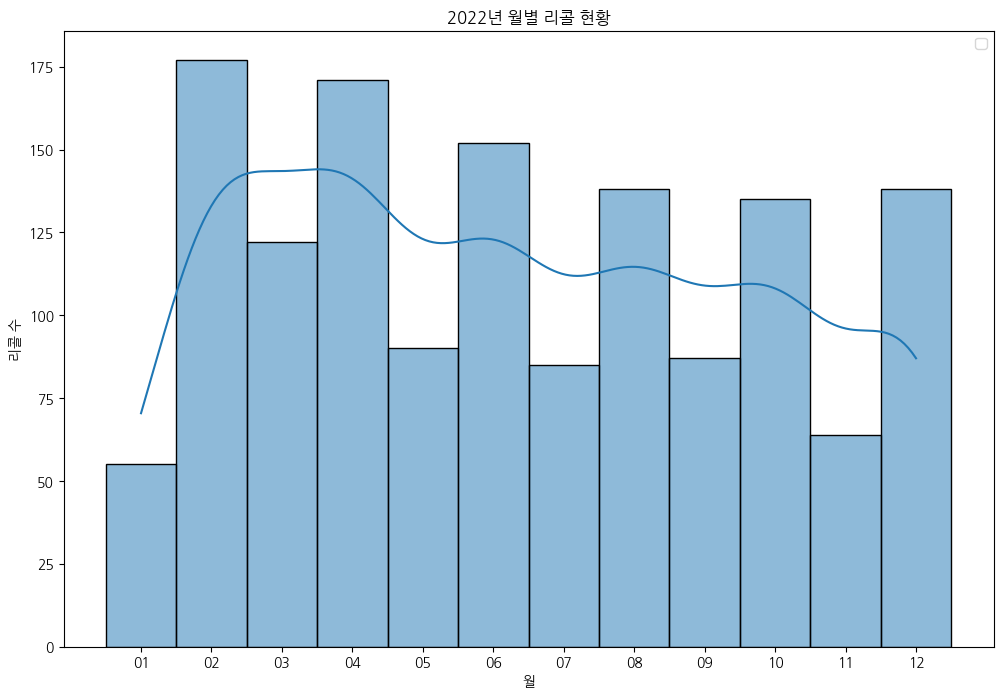

In [8]:
plt.figure(figsize=(12,8))
plt.title('2022년 월별 리콜 현황')
plt.xlabel('월')
plt.ylabel('리콜 수')
plt.legend()
sns.histplot(data=data, x='리콜개시월', kde=True)

In [9]:
# 날짜 열을 datetime 형식으로 변환
data['생산기간(부터)'] = pd.to_datetime(data['생산기간(부터)'])
data['생산기간(까지)'] = pd.to_datetime(data['생산기간(까지)'])

# 생산평균일 계산
data['생산평균일'] = data.apply(lambda row: row['생산기간(부터)'] + (row['생산기간(까지)'] - row['생산기간(부터)']) / 2, axis=1).dt.year
data['생산평균일'].astype(int)
data

,제작자,차명,생산기간(부터),생산기간(까지),리콜개시일,리콜사유,리콜개시월,생산평균일
0,혼다코리아(주),CBR1000RR-R,2021-04-29,2021-05-12,2022-01-03,제작 공정 중 라디에이터 캡의 제조 불량으로 라디에이터 캡과 필러넥이 제대로 밀착되...,01,2021
1,폭스바겐그룹코리아 주식회사,Polo 5 FL 1.4 TDI BMT,2014-11-17,2014-11-25,2022-01-05,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ...",01,2014
2,폭스바겐그룹코리아 주식회사,Jetta 6 FL 2.0 TDI 110PS,2014-11-05,2015-02-26,2022-01-05,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ...",01,2014
3,폭스바겐그룹코리아 주식회사,Jetta 1.6 TDI BMT,2011-02-28,2012-09-25,2022-01-05,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ...",01,2011
4,폭스바겐그룹코리아 주식회사,Golf A7 1.6 TDI BMT,2014-12-19,2015-02-26,2022-01-05,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ...",01,2015
...,...,...,...,...,...,...,...,...
1409,비엠더블유코리아(주),BMW i4 M50,2021-11-22,2022-10-24,2022-12-26,배터리 관리 모듈(SME)*과 관련한 제작 결함이 발견되었습니다. *배터리 관리 모...,12,2022
1410,비엠더블유코리아(주),BMW i4 eDrive40,2021-11-23,2022-10-24,2022-12-26,배터리 관리 모듈(SME)*과 관련한 제작 결함이 발견되었습니다. *배터리 관리 모...,12,2022
1411,(주)스포츠모터사이클코리아,1290 SUPER DUKE R,2020-02-11,2022-04-29,2022-12-27,메인 와이어링 하네스와 차체 구성 부품 간의 간섭으로 인한 피복 손상으로 배선 단선...,12,2021
1412,화창상사(주),SPRINGFIELD,2019-10-28,2020-06-03,2022-12-27,차량제어모듈(VEHICLE CONTROL MODULE) 및 커넥터 접촉 불량(헐거움...,12,2020


생산평균일
2005      8
2006     22
2007     18
2008     26
2009     17
2010     13
2011     12
2012     18
2013     28
2014     44
2015     49
2016     58
2017     78
2018     68
2019    159
2020    250
2021    400
2022    146
Name: 제작자, dtype: int64


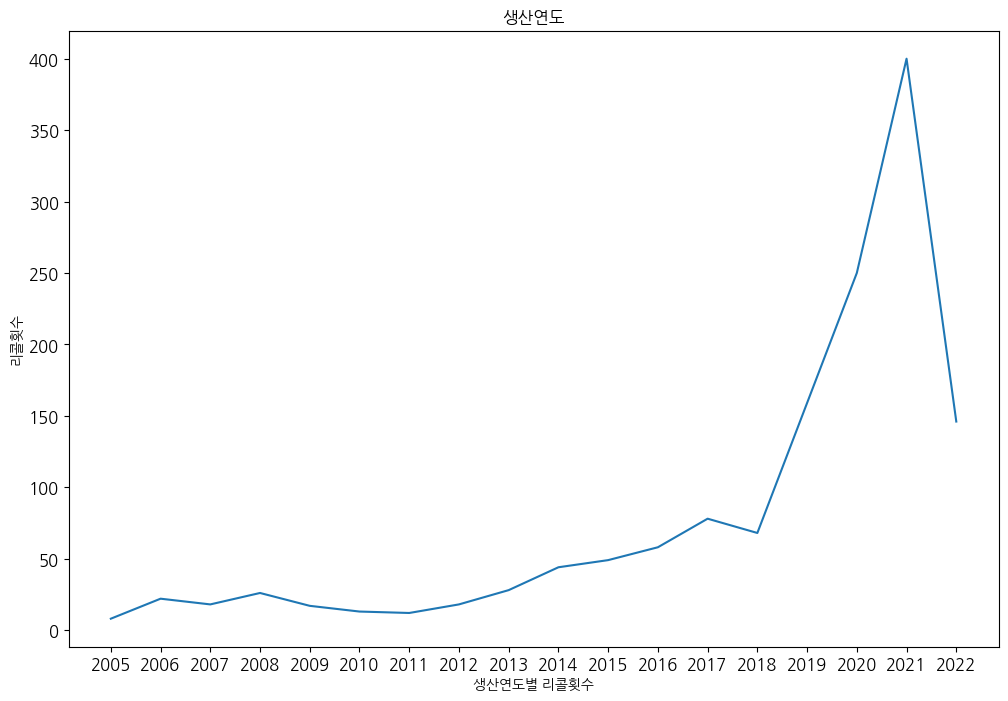

In [10]:
year_data= data.groupby('생산평균일')['제작자'].count()
print(year_data)

# 막대 그래프의 크기를 설정합니다.
plt.figure(figsize=(12, 8))
year_data.plot(fontsize=12)
plt.xlabel('생산연도별 리콜횟수')
plt.ylabel('리콜횟수')
plt.title('생산연도')
plt.xticks(np.linspace(2005, 2022, 18))
plt.yticks()
plt.show()

In [18]:
# Extract month from '리콜개시일'
data['리콜개시월'] = pd.to_datetime(data['리콜개시일']).dt.month

# Group by '리콜개시월' and '제작자' to count the number of recalls
recall_counts = data.groupby(['리콜개시월', '제작자']).size().reset_index(name='리콜횟수')

# Find the manufacturer with the most recalls each month
max_recalls_by_month = recall_counts.loc[recall_counts.groupby('리콜개시월')['리콜횟수'].idxmax()]

max_recalls_by_month

,리콜개시월,제작자,리콜횟수
0,1,만트럭버스코리아(주),15
19,2,폭스바겐그룹코리아 주식회사,75
30,3,메르세데스벤츠코리아(주),46
42,4,메르세데스벤츠코리아(주),90
54,5,메르세데스벤츠코리아(주),54
70,6,비엠더블유코리아(주),111
78,7,메르세데스벤츠코리아(주),21
90,8,비엠더블유코리아(주),107
101,9,메르세데스벤츠코리아(주),22
114,10,메르세데스벤츠코리아(주),38


In [15]:
most_recall = data[data['제작자']=='비엠더블유코리아(주)']
most_recall.reset_index(inplace=True, drop = True)

import nltk
from konlpy.tag import Kkma
from konlpy.tag import Twitter
from wordcloud import WordCloud

reasons = []
for i in range(len(most_recall)):
    reasons.append(most_recall['리콜사유'][i])
    print(i+1, most_recall['리콜사유'][i])

reason = ''.join(reasons)
filtered_reason = reason.replace('.', ' ').replace('"', ' ').replace(',',' ').replace("'", " ").replace('·', ' ').replace('=', ' ').replace('\n', ' ')


tw = Twitter()
tokens_ko = tw.nouns(filtered_reason)


ko = nltk.Text(tokens_ko, name='사유 내 명사')


stopword = ['가능성']

new_ko=[]
for word in ko:
    if len(word) > 1 and word != ' ' and word not in stopword:
        new_ko.append(word)


ko = nltk.Text(new_ko, name = '사유 내 명사 두번째')


dat = ko.vocab().most_common(150)
dat = dict(dat)

1 BMW 자체 품질 조사 결과 2021년 11월 22일부터 2021년 11월 30일까지 제작된 BMW i4 eDrive40, i4 M50 차량 72대의 차량 생산 과정에서 고전압 배터리 충격 완화 패드*가 장착되지 않았을 가능성을 확인하였습니다. *고전압 배터리 충격 완화 패드: 배터리와 차대 사이에 장착되어 측면 충돌 시 차대가 고전압 배터리에 손상을 입히는 것을 최소화하는 장치
2 BMW 자체 품질 조사 결과 2021년 11월 22일부터 2021년 11월 30일까지 제작된 BMW i4 eDrive40, i4 M50 차량 72대의 차량 생산 과정에서 고전압 배터리 충격 완화 패드*가 장착되지 않았을 가능성을 확인하였습니다. *고전압 배터리 충격 완화 패드: 배터리와 차대 사이에 장착되어 측면 충돌 시 차대가 고전압 배터리에 손상을 입히는 것을 최소화하는 장치
3 차량 전면부 그릴 등화가 '자동차 및 자동차부품의 성능과 기준에 관한 규칙' 제40조(차폭등)의 고장 시 작동기준을 충족하지 못하는 것으로 확인되었습니다.
4 차량 전면부 그릴 등화가 '자동차 및 자동차부품의 성능과 기준에 관한 규칙' 제40조(차폭등)의 고장 시 작동기준을 충족하지 못하는 것으로 확인되었습니다.
5 차량 전면부 그릴 등화가 '자동차 및 자동차부품의 성능과 기준에 관한 규칙' 제40조(차폭등)의 고장 시 작동기준을 충족하지 못하는 것으로 확인되었습니다.
6 차량 전면부 그릴 등화가 '자동차 및 자동차부품의 성능과 기준에 관한 규칙' 제40조(차폭등)의 고장 시 작동기준을 충족하지 못하는 것으로 확인되었습니다.
7 차량 전면부 그릴 등화가 '자동차 및 자동차부품의 성능과 기준에 관한 규칙' 제40조(차폭등)의 고장 시 작동기준을 충족하지 못하는 것으로 확인되었습니다.
8 차량 전면부 그릴 등화가 '자동차 및 자동차부품의 성능과 기준에 관한 규칙' 제40조(차폭등)의 고장 시 작동기준을 충족하지 못하는 것으로 확인되었습니다.
9 차량 전면부 그릴 등화가 '자동차 및 자동차부품의 성능과 

/usr/local/lib/python3.10/dist-packages/konlpy/tag/_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


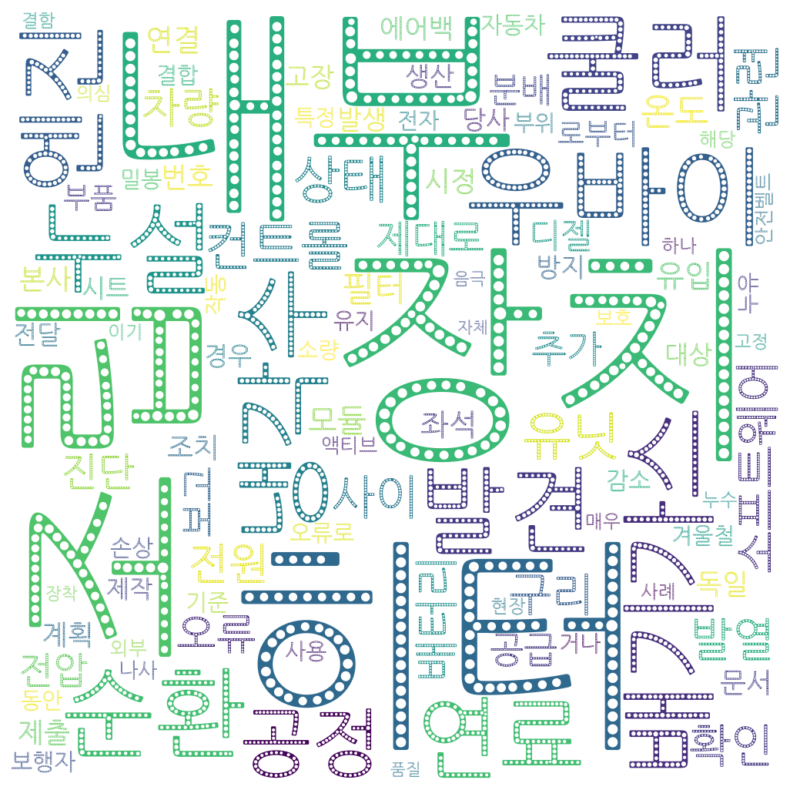

In [16]:
wordcloud = WordCloud().generate(filtered_reason)
font = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'
wc = WordCloud(font_path=font,\
               background_color="white",\
               width=1000, \
               height=1000, \
               max_words=100, \
               max_font_size=300)

wc = wc.generate_from_frequencies(dat)

plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()


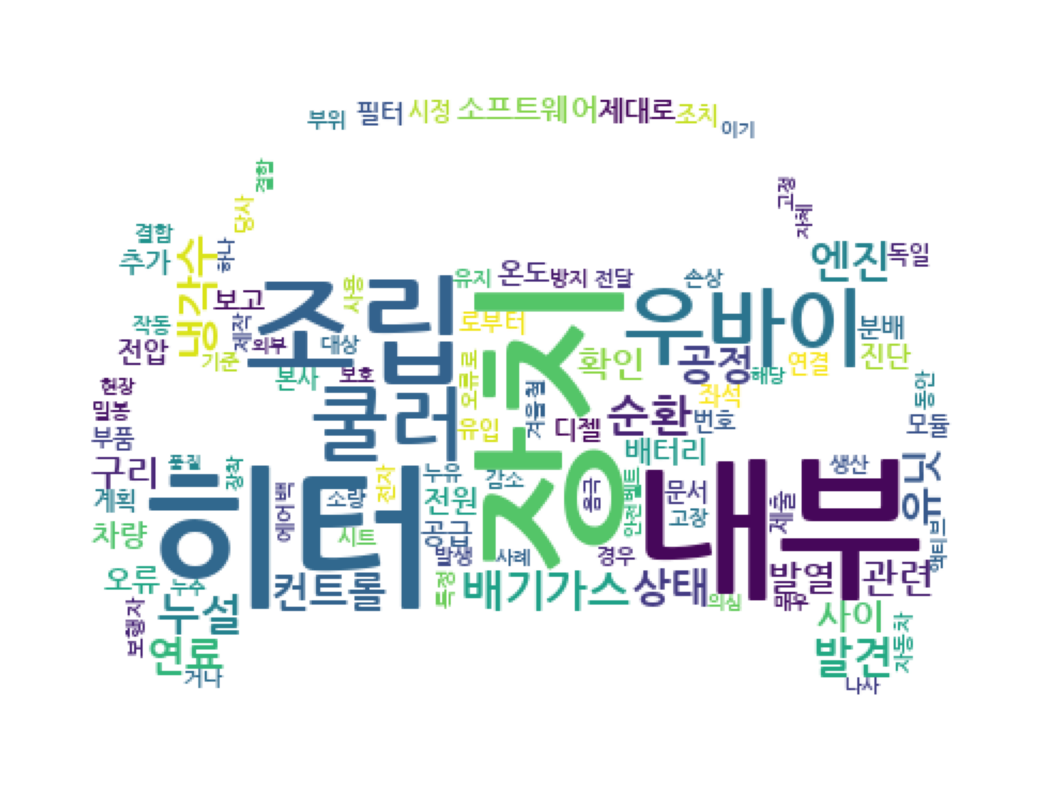

In [17]:
from PIL import Image
import numpy as np

word_mask=np.array(Image.open('/content/car_icon.jpg'))
word_mask

wordcloud=WordCloud(max_words=100,
                    font_path='/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
                    mask=word_mask,
                    background_color='white').generate_from_frequencies(dat)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()